# Codes Abstract
**- Copying an image**

`from PIL import Image`

`import cv2`

`import numpy as np`

`baboon=cv2.imread('baboon.png')`

`id(baboon):140555615378048`      #use the `id function` to find the object's memory address.

`A=baboon`

`id(A):140555615378048`

`B=baboon.copy()`    #we will see the memory address is different

`id(B):155555655378048`

`baboon[:,:,]=0` #we set all the elements in baboon array equals to 0, both baboon and A will become 0, while B has not been changed

**- Flipping Images**

- flip an image by changing the index value of a pixel or intensity, convert column index to row index
- For color images, we can convert all the color channels at the same time

`from PIL import ImageOps`

`im_flip=ImageOps.flip(image)`

`im_mirror=ImageOps.mirror(image)`

`image.transpose(Image.FLIP_TOP_BOTTOM)` #the image module has build-in attributes to describe the type of flip, in this case, we filp image *upside down*

-------------------------------------------------------------

`import cv2`

Method1: `im_flip=cv2.flip(image,0)` #the input is image name, the parameter is flipcode. If =0, it will flip vertically around the y-axis

Method2: `im_flip=cv2.rotate(image,cv2.ROTATE_90_CLOCKWISE)` #just state clear the rotate angle and direction

**Manipulating Images One Pixel at a Time**

- Cropping
  - Concept: cutting out the part of the image and throwing out the rest.
  - normally we use `slice` method

-Vertically

`upper=150`

`lower=400`

`crop_top=image[upper:lower,:,:]` #lower is the *last row* we would like to include, upper: *the first row* we would like to include the image

-Horizontally

`left=150`

`right=400`

`crop_horizontal=crop_top[:,left:right,:]` #right: the **first** column that we would like to include in the image; left:the **last** column we would like to include

-------------------------------------------------------------

`image=Image.open('cat.png')`

`crop_image=image.crop((left,upper,right,lower))`

- Change image pixels

`from PIL import ImageDraw`

`image_draw=image.copy()`

`image_fn=ImageDraw.Draw(im=image_draw)`

`shape=[left,upper,right,lower]image_fn.rectangle(xy=shape,fill='red')`       #draw a rectangle fill with red color

-------------------------------------------------------------

-We can fill image with other shapes, use `imagefont` model to attend font

`from PIL import ImageFont`

`fnt=ImageFont.truetype('/Library/Fonts/Arial.ttf',100)` 

-There are other shapes we can use overlay text on an image. We set `text method` to place text on image

`image_fn.text(xy=(0,0),text='box',font=fnt,fill=(0,0,0))` #fill state the color to use for the font, text parameter states the text to be drawn on the picture, xy: the position of text content

`image_Doris=Image.open('DorisWang.png')`  #superimpose the image of the cat over 'image_Doris'

`left=150`

`upper=150`

`image_Doris.paste(crop_image,box=(left,upper)` #we declare the position we put cat image

-use OpenCV method

`image_draw=np.copy(image)`

`left=150`

`upper=150`

`right=400`

`lower=400`

`start_point.end_point=(left,upper),(right,lower)`

`image_draw=np.copy(image)`

`cv2.rectangle(image_draw,pt1=start_point,pt2=end_point,color=(0,255,0),thickness=3)`

-overlay text over an open CV array 'image'

`cv2.putText(img=image,text='Stuff',org=(10,500),color=(255,255,255),fontFace=4,fontScale=5,thickness=2)`  #org is the bottom-left corner of the text string


#Basic Image Manipulation with Pillow

In [145]:
#import photos from lab
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png

--2022-08-19 04:28:37--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 637192 (622K) [image/png]
Saving to: ‘baboon.png’

baboon.png          100%[===================>] 622.26K  --.-KB/s    in 0.02s   

2022-08-19 04:28:37 (34.9 MB/s) - ‘baboon.png’ saved [637192/637192]



In [146]:
#import python packages
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Copying Images
Reassign an array to another variable, we should use the `copy` method.

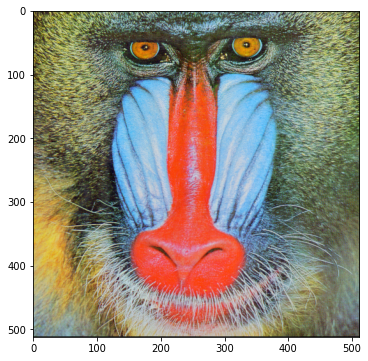

In [147]:
baboon=np.array(Image.open('baboon.png'))
plt.figure(figsize=(6,6))
plt.imshow(baboon)
plt.show()

In [148]:
#if we don't want to use copy method, the two variables would point to the same location in memory
A = baboon
#use the id function to find a variable's memory address
id(A) == id(baboon) #the result we see the two photo memory’s positions are the same

True

In [149]:
B = baboon.copy()
id(B)==id(baboon) #if we use copy method, the memory positions of these two are different

False

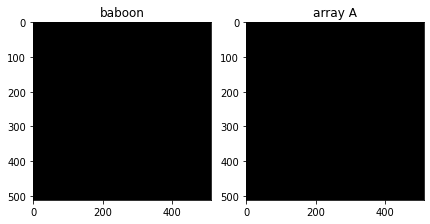

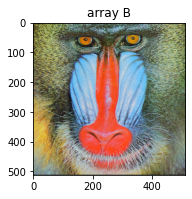

In [150]:
#If we set all baboon's entries to zero, all entires in A will become zero as well.While, B is not affected.
baboon[:,:,] = 0
plt.figure(figsize=(7,7))
plt.subplot(121)
plt.imshow(baboon)
plt.title("baboon")
plt.subplot(122)
plt.imshow(A)
plt.title("array A")
plt.show()
plt.subplot(122)
plt.imshow(B)
plt.title("array B")
plt.show()

# Flipping Images
Reordering the indices of the pixels such that it changes the orientation of the image.

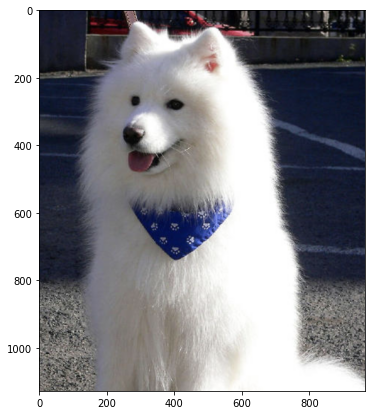

In [151]:
image = Image.open("Samoyed.png") #photo from internet...
plt.figure(figsize=(7,7))
plt.imshow(image)
plt.show()

In [152]:
#find the shape in array
array = np.array(image)
width, height, C = array.shape
print('width, height, C', width, height, C)

width, height, C 1128 966 4


- Filp Vertically

In [153]:
#we create an array of the same size with datatype np.uint8.
array_flip = np.zeros((width, height, C), dtype=np.uint8)

In [154]:
#assign the first row of pixels of the original array to the new array’s last row,repeat the process for every row
for i,row in enumerate(array):
    array_flip[width - 1 - i, :, :] = row     
#incrementing the row number from the original array and decreasing the new array’s row index to assign the pixels accordingly

In [155]:
from PIL import ImageOps

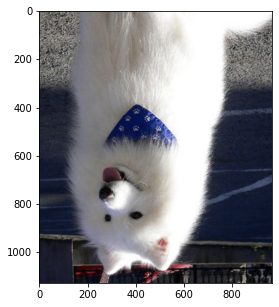

In [156]:
#flip
im_flip = ImageOps.flip(image)
plt.figure(figsize=(5,5))
plt.imshow(im_flip)
plt.show()

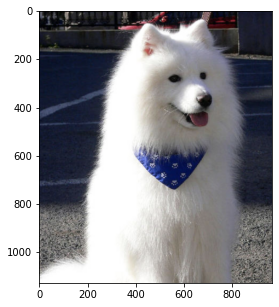

In [157]:
#Mirror
im_mirror = ImageOps.mirror(image)
plt.figure(figsize=(5,5))
plt.imshow(im_mirror)
plt.show()

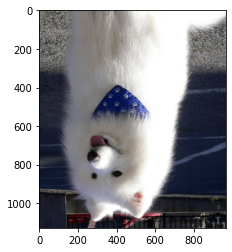

In [158]:
#Transpose
im_flip = image.transpose(1) #the parameter indicating what type of transposition we would like to perform, up-bottom is 1.
plt.imshow(im_flip)
plt.show()

In [159]:
#we can find the integer parameters using dict method
flip = {"FLIP_LEFT_RIGHT": Image.FLIP_LEFT_RIGHT,
        "FLIP_TOP_BOTTOM": Image.FLIP_TOP_BOTTOM,
        "ROTATE_90": Image.ROTATE_90,
        "ROTATE_180": Image.ROTATE_180,
        "ROTATE_270": Image.ROTATE_270,
        "TRANSPOSE": Image.TRANSPOSE, 
        "TRANSVERSE": Image.TRANSVERSE}

In [160]:
flip["FLIP_LEFT_RIGHT"]

0

In [161]:
flip["FLIP_TOP_BOTTOM"]

1

In [162]:
flip["ROTATE_90"]

2

In [163]:
flip["ROTATE_180"]

3

In [164]:
flip["ROTATE_270"]

4

In [165]:
flip["TRANSPOSE"]

5

In [166]:
flip["TRANSVERSE"]

6

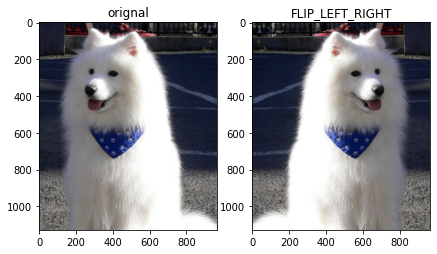

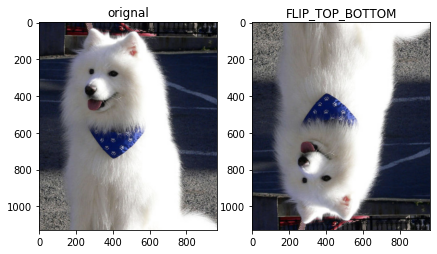

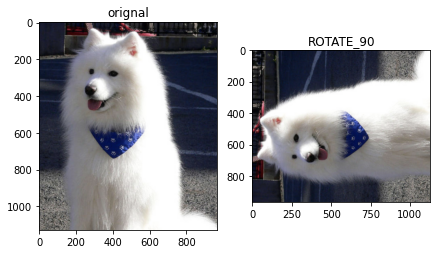

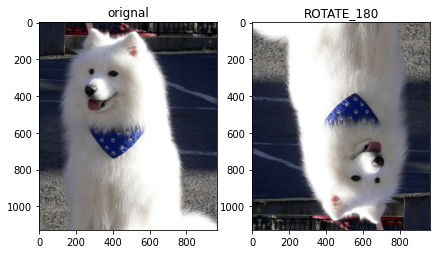

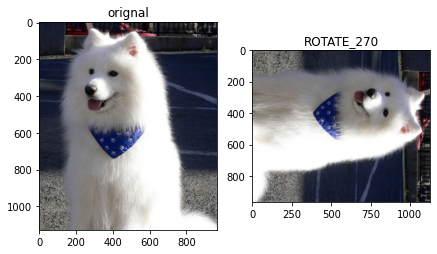

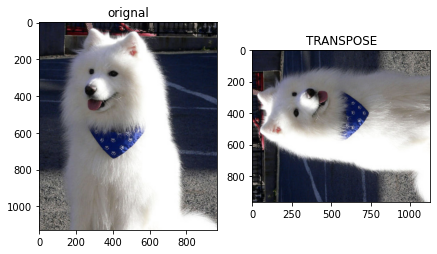

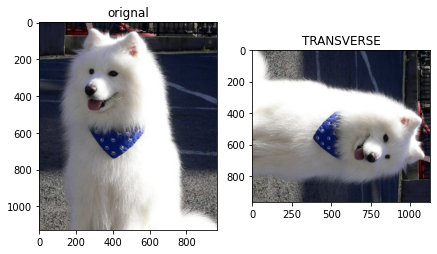

In [167]:
#get the filp outcomes using for loop and matplotlib
for key, values in flip.items():
    plt.figure(figsize=(7,7))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title("orignal")
    plt.subplot(1,2,2)
    plt.imshow(image.transpose(values))
    plt.title(key)
    plt.show()

# Cropping an Image
cutting off action

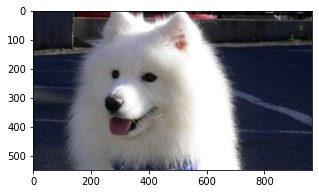

In [168]:
upper = 50 #the index of the first row that we would like to include in the image,selected by index
lower = 600 #last row we would like to include
crop_top = array[upper:lower, : , : ]
plt.figure(figsize=(5,5))
plt.imshow(crop_top)
plt.show()

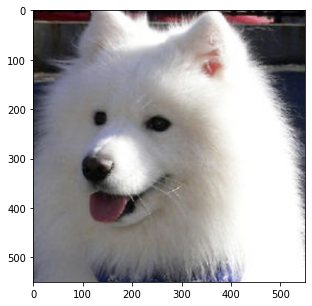

In [169]:
#the same as horizontal cropping
left = 150
right = 700
crop_horizontal = crop_top[: ,left:right,:]
plt.figure(figsize=(5,5))
plt.imshow(crop_horizontal)
plt.show()

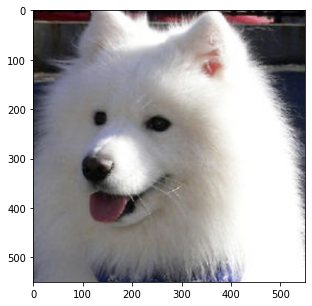

In [170]:
#use crop function in PIL
image = Image.open("Samoyed.png")
crop_image = image.crop((left, upper, right, lower))
plt.figure(figsize=(5,5))
plt.imshow(crop_image)
plt.show()

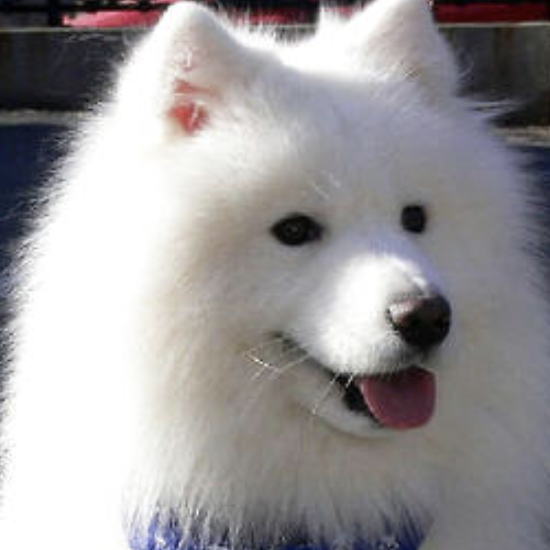

In [171]:
#flip it
crop_image = crop_image.transpose(Image.FLIP_LEFT_RIGHT)
crop_image

# Changing Specific Image Pixels

In [172]:
#change specific image pixels using array indexing
array1 = np.copy(array)
array1[upper:lower, left:right, 1:2] = 0 #set all the green and blue channels in the original image we cropped to zero

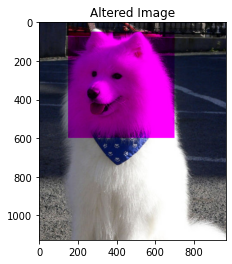

In [173]:
plt.imshow(array1)
plt.title("Altered Image")
plt.show()

In [174]:
from PIL import ImageDraw 

In [175]:
#copy the image object
image_draw = image.copy()

In [176]:
#creates an object that can be used to draw in the given image
image_fn = ImageDraw.Draw(im=image_draw) #input im is the image we would like to draw in

In [177]:
shape = [left, upper, right, lower] 
image_fn.rectangle(xy=shape,fill="lightpink")

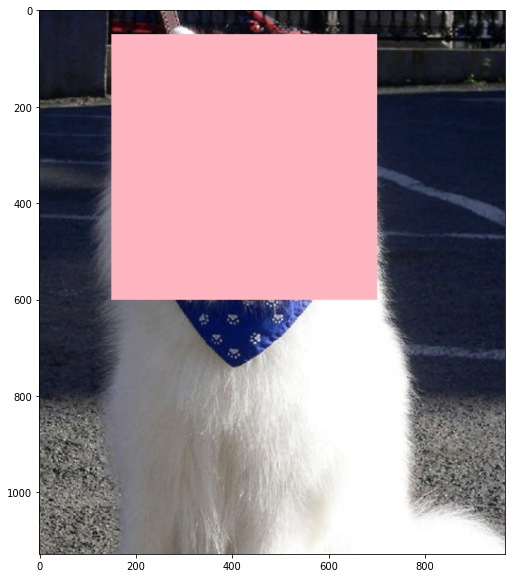

In [178]:
plt.figure(figsize=(10,10))
plt.imshow(image_draw)
plt.show()

In [179]:
from PIL import ImageFont

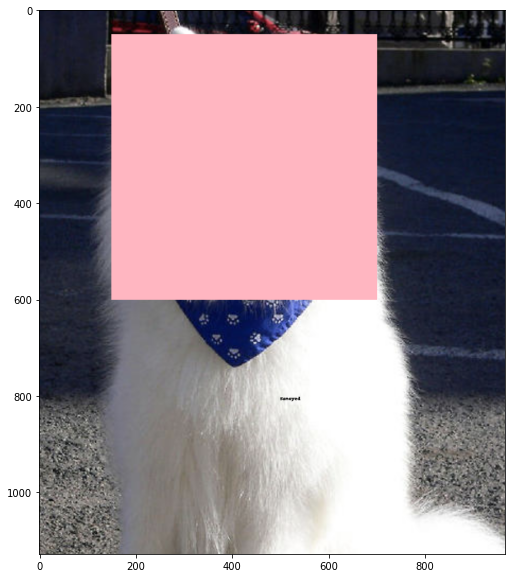

In [180]:
#use the text method to place the text on the image
image_fn.text(xy=(500,800),text="Samoyed",fill=(0,0,0))
plt.figure(figsize=(10,10))
plt.imshow(image_draw)
plt.show()

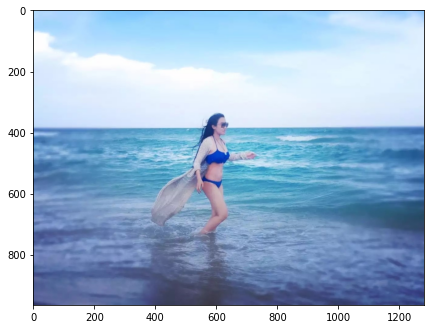

In [181]:
image_DW = Image.open("Doris_Wang.png")
plt.figure(figsize=(7,7))
plt.imshow(image_DW)
plt.show()

- **paste** one image over another by *reassigning the pixel* for one array to the next.

In [182]:
image_DW.paste(crop_image, box=(left,upper))

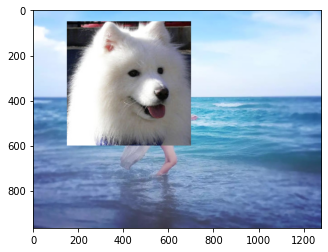

In [183]:
plt.imshow(image_DW)
plt.show()

In [184]:
#create two image objects, we set new_image to the image, and we use the method copy() for the copy_image object.
image = Image.open("Samoyed.png")
new_image=image
copy_image=image.copy()

In [185]:
#the same memory address relationship exists
id(image)==id(new_image)

True

In [186]:
id(image)==id(copy_image) #If we use the method copy(), the address is different:

False

In [187]:
image_fn= ImageDraw.Draw(im=image)
image_fn.text(xy=(500,800),text="Samoyed",fill=(0,0,0))
image_fn.rectangle(xy=shape,fill="cadetblue")

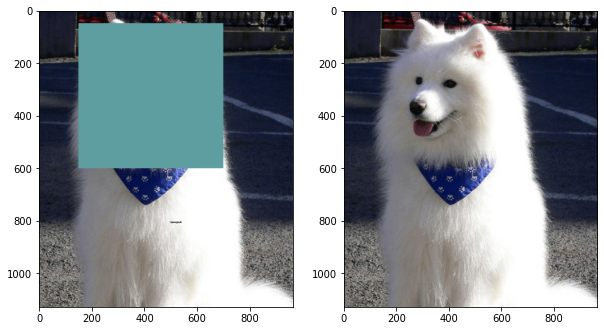

In [188]:
#If we change the object image, new_image will change, but copy_image will remain the same:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(new_image)
plt.subplot(122)
plt.imshow(copy_image)
plt.show()

# Image Manipulation with OpenCV

In [189]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png

--2022-08-19 04:28:48--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 637192 (622K) [image/png]
Saving to: ‘baboon.png’

baboon.png          100%[===================>] 622.26K  --.-KB/s    in 0.01s   

2022-08-19 04:28:48 (48.5 MB/s) - ‘baboon.png’ saved [637192/637192]



In [190]:
import cv2

# Copying Images

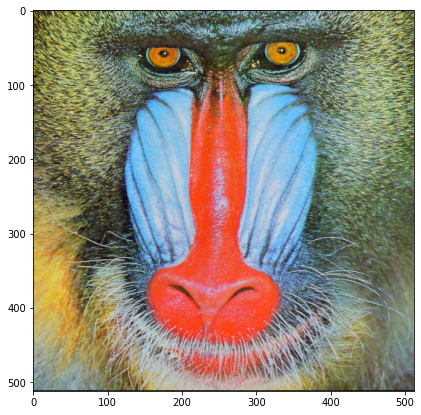

In [191]:
baboon = cv2.imread("baboon.png")
plt.figure(figsize=(7,7))
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB)) #change the color channel
plt.show()

In [192]:
A = baboon
id(A)==id(baboon)
id(A)

139777686538544

In [193]:
B = baboon.copy()
id(B)==id(baboon)

False

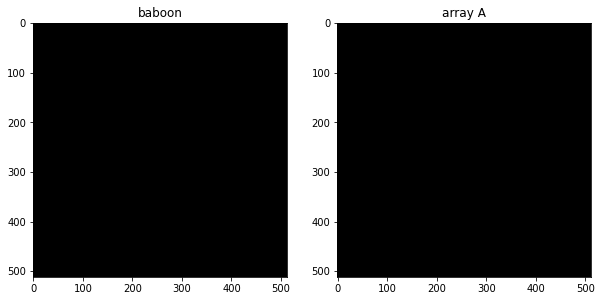

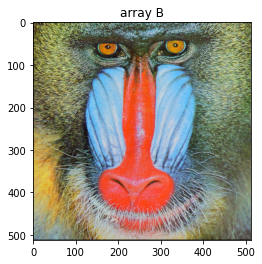

In [194]:
baboon[:,:,] = 0
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.title("baboon")
plt.subplot(122)
plt.imshow(cv2.cvtColor(A, cv2.COLOR_BGR2RGB))
plt.title("array A")
plt.show()
plt.imshow(cv2.cvtColor(B, cv2.COLOR_BGR2RGB))
plt.title("array B")
plt.show()

# Filpping Images

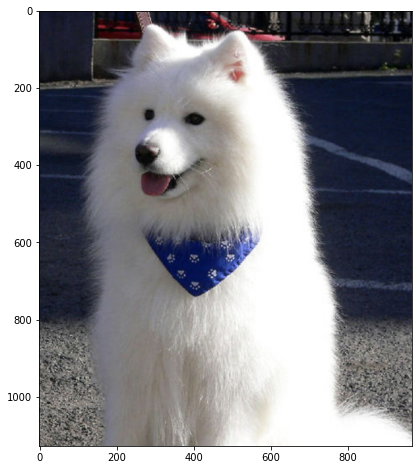

In [195]:
image = cv2.imread("Samoyed.png")
plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [196]:
width, height,C=image.shape
print('width, height,C',width, height,C)

width, height,C 1128 966 3


In [197]:
array_flip = np.zeros((width, height,C),dtype=np.uint8)

In [198]:
for i,row in enumerate(image):
        array_flip[width-1-i,:,:]=row

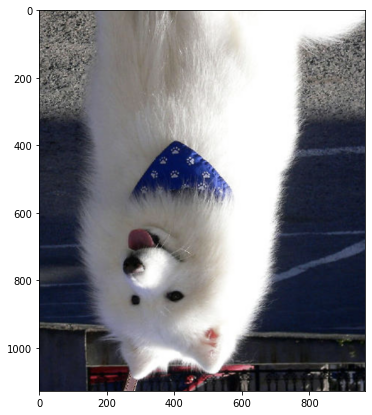

In [199]:
plt.figure(figsize=(7,7))
plt.imshow(cv2.cvtColor(array_flip, cv2.COLOR_BGR2RGB))
plt.show()

**OpenCV** has several ways to flip an image, we can use the `flip()` function; we have the *input image array*. The parameter is the **flipCode**.
- `flipcode = 0`: flip vertically around the x-axis
- `flipcode > 0`: flip horizontally around y-axis positive value
- `flipcode< 0`: flip vertically and horizontally, flipping around both axes negative value

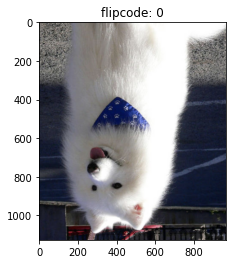

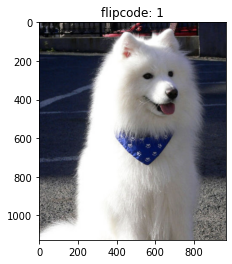

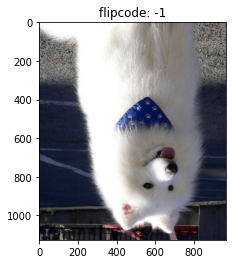

In [200]:
for flipcode in [0,1,-1]:
    im_flip =  cv2.flip(image,flipcode )
    plt.imshow(cv2.cvtColor(im_flip,cv2.COLOR_BGR2RGB))
    plt.title("flipcode: "+str(flipcode))
    plt.show()

- use the `rotate()` function

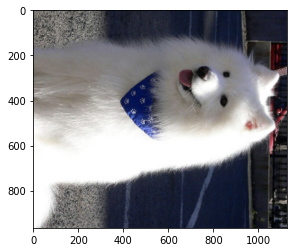

In [201]:
im_flip = cv2.rotate(image,0) #the integer parameter is the kind of rotate
plt.imshow(cv2.cvtColor(im_flip,cv2.COLOR_BGR2RGB))
plt.show()

In [202]:
#use dictionary to find the kinds of flip
flip = {"ROTATE_90_CLOCKWISE":cv2.ROTATE_90_CLOCKWISE,
        "ROTATE_90_COUNTERCLOCKWISE":cv2.ROTATE_90_COUNTERCLOCKWISE,
        "ROTATE_180":cv2.ROTATE_180}

In [203]:
flip["ROTATE_90_CLOCKWISE"]

0

In [204]:
flip["ROTATE_90_COUNTERCLOCKWISE"]

2

In [205]:
flip["ROTATE_180"]

1

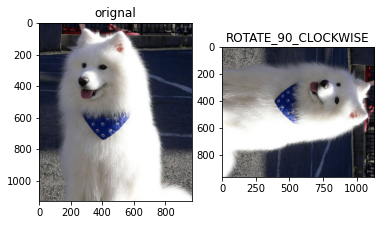

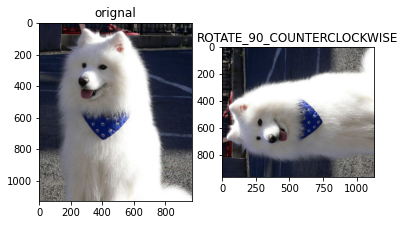

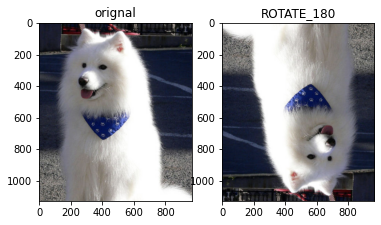

In [206]:
#plot each of the outputs using the different parameter values
for key, value in flip.items():
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("orignal")
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(cv2.rotate(image,value), cv2.COLOR_BGR2RGB))
    plt.title(key)
    plt.show()

# Cropping Images

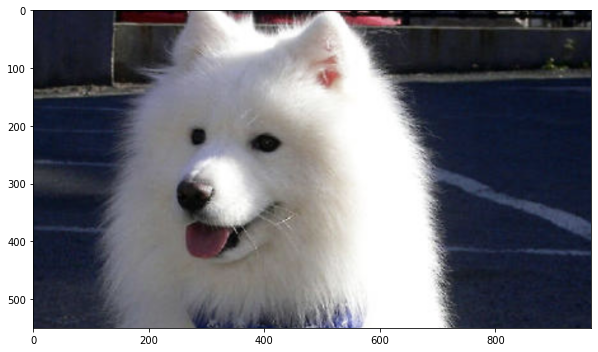

In [207]:
upper = 50 #the index of the first row that we would like to include in the image,selected by index
lower = 600
crop_top = image[upper: lower,:,:]
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(crop_top, cv2.COLOR_BGR2RGB))
plt.show()

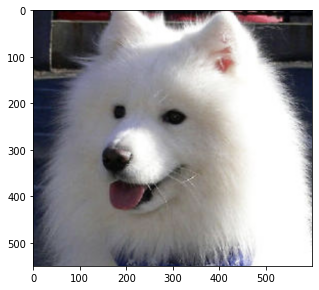

In [208]:
left = 100
right = 700
crop_horizontal = crop_top[: ,left:right,:]
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(crop_horizontal, cv2.COLOR_BGR2RGB))
plt.show()

# Changing Specific Image Pixels

In [209]:
array4 = np.copy(image)
array4[upper:lower,left:right,:] = 0

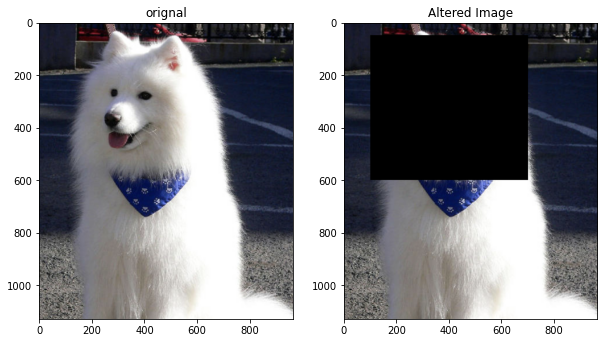

In [210]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title("orignal")
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(array4,cv2.COLOR_BGR2RGB))
plt.title("Altered Image")
plt.show()

use the method `rectangle`. 
- The parameter **pt1** is the *top-left coordinate* of the rectangle: (left,top) or  (𝑥_0,𝑦_0) 
- **pt2** is the *bottom right coordinate*(right,lower) or  (𝑥_1,𝑦_1) . 
- The parameter **color** is the intensity of each channel ( blue, green, red). 
- We have the **line thickness**

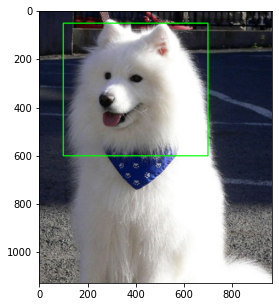

In [211]:
start_point, end_point = (left, upper),(right, lower)
image_draw = np.copy(image)
cv2.rectangle(image_draw, pt1=start_point, pt2=end_point, color=(0, 255, 0), thickness=3) 
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))
plt.show()

`putText` function to overlay text content on an image
- img: Image array
- text: Text string to be overlayed
- org: position
- fontFace: tye type of font
- fontScale: Font scale
- color: Text color
- thickness: Thickness of the lines used to draw a text

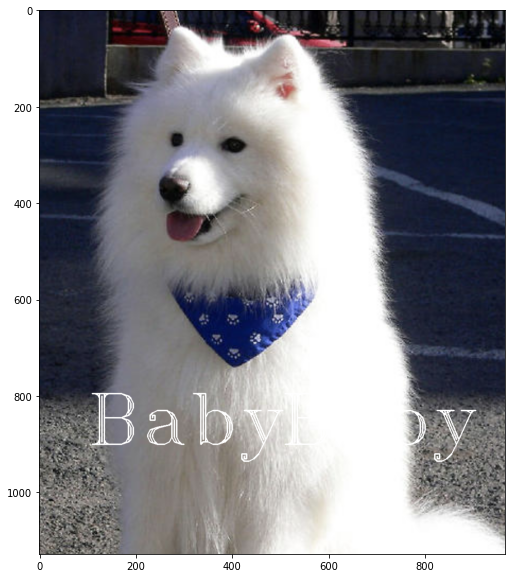

In [213]:
image_draw=cv2.putText(img=image,text='Baby',org=(100,900),color=(255,255,255),fontFace=4,fontScale=5,thickness=2)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image_draw,cv2.COLOR_BGR2RGB))
plt.show()